### 六、神经网络

In [1]:
import sys
sys.path.append('/home/aistudio/mylib')
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager
import seaborn as sns
import numpy as np
# 设置matplotlib使用中文字体以正确显示中文字符
font_path = r'/home/aistudio/workplace/STKAITI.TTF'  # 假设字体文件在当前工作目录下
font_prop = font_manager.FontProperties(fname=font_path)

# 如果想让matplotlib永久记住这个字体，可以将其添加到字体缓存中
font_manager.fontManager.addfont(font_path)

# 设置默认字体
plt.rcParams['font.sans-serif'] = ['STKaiti']  # 注意这里使用的是字体名称，不是文件名
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'  # 过滤掉INFO和DEBUG信息，只显示WARNING及以上
os.environ['CUDA_VISIBLE_DEVICES'] = "0"  # 指定使用的GPU编号
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
tf.compat.v1.Session(config=config)

2024-12-31 14:26:03.435998: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-31 14:26:03.635938: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-31 14:26:03.824545: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1735626364.029132    6289 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1735626364.145020    6289 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-31 14:26:04.448071: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [2]:
# 加载数据到 df
df = pd.read_csv('/home/aistudio/workplace/商品_clean.csv')

# 输出原始数据的前几行
print("原始数据预览：")
print(df.head())

# 处理缺失值，这里我们简单地删除含有缺失值的行
df = df.dropna()

# 对类别变量进行编码
label_encoders = {}
for column in ['大类编码', '中类编码', '小类编码', '商品类型', '单位', '是否促销']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column].astype(str))
    label_encoders[column] = le

# 将日期转换为特征
df['销售月份'] = pd.to_datetime(df['销售日期']).dt.month
df = df.drop(['销售日期'], axis=1)

# 确定目标变量和特征变量
X = df.drop(['销售数量'], axis=1)
y = df['销售数量']

# 对类别特征进行One-Hot编码
X = pd.get_dummies(X)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 标准化特征变量
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("数据预处理完成，准备开始构建模型。")

原始数据预览：
   顾客编号  大类编码 大类名称  中类编码  中类名称    小类编码    小类名称        销售日期    销售月份  \
0     0    12   蔬果  1201    蔬菜  120109    其它蔬菜  2015-01-01  201501   
1     1    20   粮油  2014   酱菜类  201401      榨菜  2015-01-01  201501   
2     2    15   日配  1505  冷藏乳品  150502  冷藏加味酸乳  2015-01-01  201501   
3     3    15   日配  1503  冷藏料理  150305   冷藏面食类  2015-01-01  201501   
4     4    15   日配  1505  冷藏乳品  150502  冷藏加味酸乳  2015-01-01  201501   

            商品编码    规格型号  商品类型 单位  销售数量  销售金额  商品单价 是否促销  
0  DW-1201090311            生鲜  个   8.0   4.0   2.0    否  
1  DW-2014010019     60g  一般商品  袋   6.0   3.0   0.5    否  
2  DW-1505020011    150g  一般商品  袋   1.0   2.4   2.4    否  
3  DW-1503050035    500g  一般商品  袋   1.0   6.5   8.3    否  
4  DW-1505020020  100g*8  一般商品  袋   1.0  11.9  11.9    否  
数据预处理完成，准备开始构建模型。


In [3]:
# 初始化神经网络
model = Sequential()

# 添加输入层和第一隐藏层
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))

# 添加更多隐藏层
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=16, activation='relu'))

# 添加输出层
model.add(Dense(units=1))

# 编译模型
model.compile(optimizer='adam', loss='mean_squared_error')

# 打印模型结构
print("模型架构如下：")
model.summary()

模型架构如下：


/home/aistudio/mylib/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
W0000 00:00:1735626426.853849    6289 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │       548,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 551,489 (2.10 MB)

 Trainable params: 551,489 (2.10 MB)

 Non-trainable params: 0 (0.00 B)

#### 3.训练模型

Epoch 1/50
857/857 ━━━━━━━━━━━━━━━━━━━━ 28s 31ms/step - loss: 4.5692 - val_loss: 2.1891
Epoch 2/50
857/857 ━━━━━━━━━━━━━━━━━━━━ 24s 28ms/step - loss: 2.6402 - val_loss: 2.5708
Epoch 3/50
857/857 ━━━━━━━━━━━━━━━━━━━━ 23s 27ms/step - loss: 3.7107 - val_loss: 2.6109
Epoch 4/50
857/857 ━━━━━━━━━━━━━━━━━━━━ 24s 28ms/step - loss: 4.1017 - val_loss: 2.4400
Epoch 5/50
857/857 ━━━━━━━━━━━━━━━━━━━━ 23s 27ms/step - loss: 1.9736 - val_loss: 3.6284
Epoch 6/50
857/857 ━━━━━━━━━━━━━━━━━━━━ 24s 28ms/step - loss: 3.7425 - val_loss: 2.2364
Epoch 7/50
857/857 ━━━━━━━━━━━━━━━━━━━━ 23s 26ms/step - loss: 1.9416 - val_loss: 4.7727
Epoch 8/50
857/857 ━━━━━━━━━━━━━━━━━━━━ 23s 27ms/step - loss: 1.6259 - val_loss: 5.6690
Epoch 9/50
857/857 ━━━━━━━━━━━━━━━━━━━━ 26s 30ms/step - loss: 2.8628 - val_loss: 3.9643
Epoch 10/50
857/857 ━━━━━━━━━━━━━━━━━━━━ 24s 28ms/step - loss: 2.0071 - val_loss: 5.8349
Epoch 11/50
857/857 ━━━━━━━━━━━━━━━━━━━━ 22s 26ms/step - loss: 1.5396 - val_loss: 5.4839
Epoch 12/50
857/857 ━━━━━━━━━━

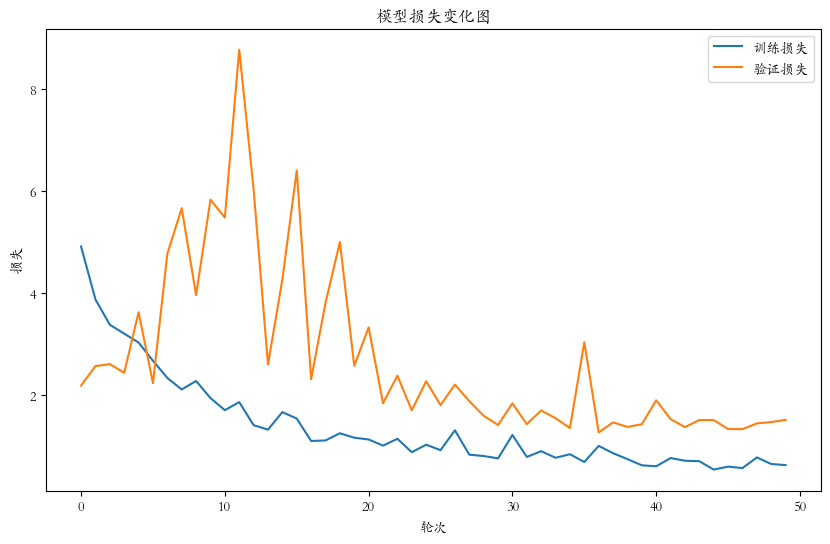

模型训练完成，并展示了损失函数随训练轮次的变化图。


In [4]:
# 训练模型
history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, verbose=1)

# 绘制训练与验证损失图
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='训练损失')
plt.plot(history.history['val_loss'], label='验证损失')
plt.title('模型损失变化图')
plt.ylabel('损失')
plt.xlabel('轮次')
plt.legend(loc='upper right')
plt.show()

print("模型训练完成，并展示了损失函数随训练轮次的变化图。")

#### 4.模型评估

268/268 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
均方误差 (MSE): 25.53163355492188
R^2 分数: -4.254521489616795


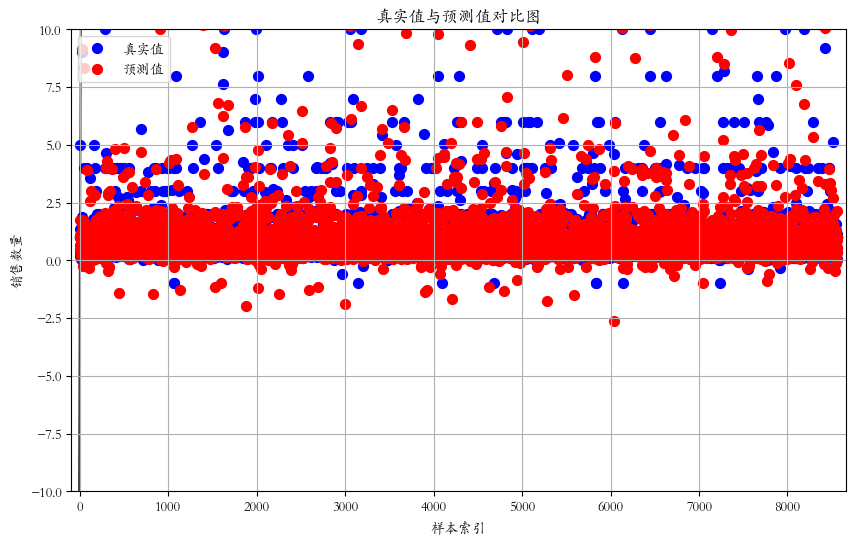

In [8]:
# 模型评估
y_pred = model.predict(X_test).flatten()  # 注意：这里将预测结果展平为一维数组

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"均方误差 (MSE): {mse}")
print(f"R^2 分数: {r2}")

# 创建散点图
plt.figure(figsize=(10, 6))

# 绘制真实值
plt.scatter(range(len(y_test)), y_test, color='blue', label='真实值', s=50)

# 绘制预测值
plt.scatter(range(len(y_pred)), y_pred, color='red', label='预测值', s=50)

# 添加对角线作为参考
lims = [np.min([plt.xlim(), plt.ylim()]), np.max([plt.xlim(), plt.ylim()])]
plt.plot(lims, lims, 'k-', alpha=0.75, zorder=0)

# 设置坐标轴标签和标题
plt.xlabel('样本索引')
plt.ylabel('销售数量')
plt.title('真实值与预测值对比图')

# 添加图例
plt.legend(loc='upper left')

# 添加网格线
plt.grid(True)

# 调整坐标轴范围
plt.xlim(-100, len(y_test) + 100)
plt.ylim(-10, 10)  # 缩小纵坐标范围

# 显示图表
plt.show()